In [37]:
import numpy as np
import matplotlib.pyplot as plt

from core import RNN, MSELoss

%matplotlib inline

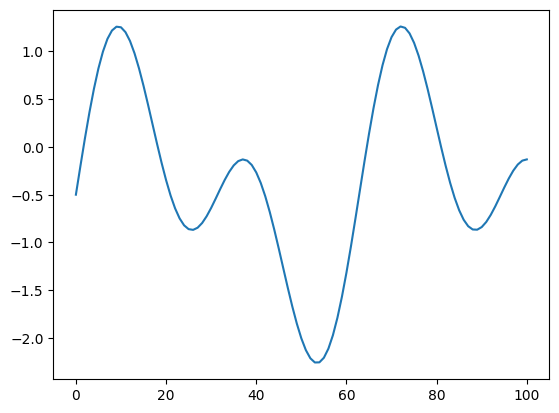

In [38]:
t = np.linspace(0, 10, 101)
data = np.sin(t) + np.sin(2 * t) - 1/2

X = data[:-1].reshape(1, -1, 1) # (B, 100, input_dim) -> (1, 100, 1)
Y = data[1:].reshape(1, -1, 1) # (1, 100, 1)

plt.plot(data)
plt.show()

In [ ]:
def sample(model: RNN, start_val: float, length=200):
    # start with shape (1, 1, 1) as (B, seq_len, inp_dim)
    current_input = np.array(start_val).reshape(1, -1, 1)
    
    h = None
    
    output_sequence = []
    
    for _ in range(length):
        out, h = model.forward(current_input, h) # Outputs (B, seq_len, out_dim)
        # we put in one char and give it its previous state (it works bc the predictions are done just via the state in each step,
        # we dont do backprop here so no info is lost)
        
        # Shorter: Notice that in forward pass we only need previous state, it doesnt matter whether it holds grad or nah.
        
        pred = out[0, 0, 0]
        output_sequence.append(pred)
        
        current_input = out
        
    return output_sequence
        

In [40]:
model = RNN(1, 128, 1)
loss_fn = MSELoss()
learning_rate = 0.001
n_epochs = 3000

In [41]:
loss_history = []

for i in range(n_epochs):
    h_prev = None
    X_noisy = X + np.random.normal(0, 0.01, X.shape)
    
    preds, _ = model.forward(X_noisy, h_prev)
    loss = loss_fn.forward(preds, Y)
    loss_history.append(loss)
    
    
    dpreds = loss_fn.backward()
    dinputs = model.backward(dpreds)
    
    model.step(learning_rate)
    
    
    if i % 100 == 0:
        print(f"Step: {i} | Loss: {loss}")

Step: 0 | Loss: 0.35381475713688815
Step: 100 | Loss: 0.028243804782883655
Step: 200 | Loss: 0.016396329242113407
Step: 300 | Loss: 0.010566539159354063
Step: 400 | Loss: 0.008003614342675248
Step: 500 | Loss: 0.006153356558259327
Step: 600 | Loss: 0.005107520069568026
Step: 700 | Loss: 0.0044006406291694925
Step: 800 | Loss: 0.003861049185749411
Step: 900 | Loss: 0.0032760478553483623
Step: 1000 | Loss: 0.00304848073293671
Step: 1100 | Loss: 0.002640325645114893
Step: 1200 | Loss: 0.0031350191678544957
Step: 1300 | Loss: 0.0024811294425576206
Step: 1400 | Loss: 0.002405114996303453
Step: 1500 | Loss: 0.0022182839051244348
Step: 1600 | Loss: 0.0019845909110138057
Step: 1700 | Loss: 0.0019290024213788298
Step: 1800 | Loss: 0.002140766093319488
Step: 1900 | Loss: 0.001866821667085137
Step: 2000 | Loss: 0.0018910403885055802
Step: 2100 | Loss: 0.0017602159827120533
Step: 2200 | Loss: 0.0017941936015096246
Step: 2300 | Loss: 0.001560126494733541
Step: 2400 | Loss: 0.0016154993508448786
Ste

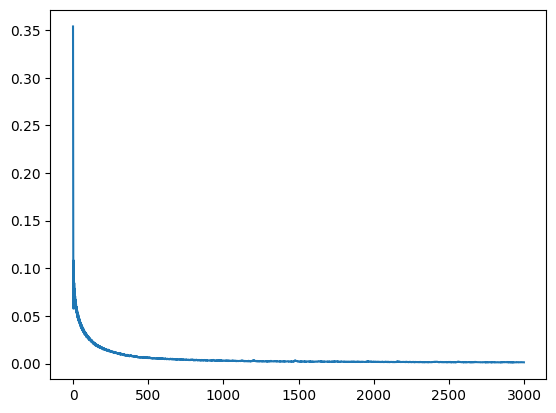

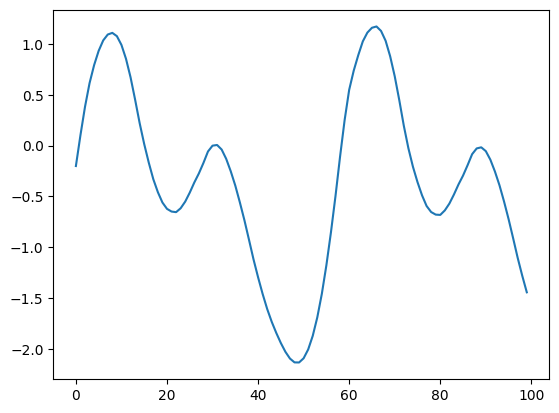

In [48]:
plt.plot(loss_history)
plt.show()

sample_sequence = sample(model, -1/2, 100)
plt.plot(sample_sequence)
plt.show()